In [14]:
from random import *


## Question 1.e

In [77]:

g = {'1': ['2', '3'],
    '2': ['1', '3', '5'],
    '3' : ['1', '2', '4'],
    '4' : ['3', '5'],
    '5' : ['2', '4']
}

def contraction(g, arete):
    i, j = arete  #les deux sommets de l'arête 
    noeud = i + "," + j #le nouveau sommet
    g[noeud] = [] #la liste des successeur du sommet 
    #O(n)
    for elm in g[i]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    #O(n)
    for elm in g[j]:
        if elm not in i.split(',') and elm not in j.split(','):
            g[noeud].append(elm)
    
    del g[i] 
    del g[j]
    return g


## Question 1.f

In [17]:
#Chaque sommet existe dans le dictionnaire exactement le nombre de fois ou elle est relier par une arête 
##On construit une liste qui est la concatination de toutes les liste du dictionaire on note LISTE
####Sa complexiter est O(n) 
## 1 - on tire un sommet aléatoir dans la liste LIST on note S 
#  2 - on tire un autre sommet aléatoir de la liste du sommet S 
def randomSommet(g):
    liste = []
    #O(n)
    for elm in g.keys():
        liste += list(g[elm])
    
    i = randint(0, len(liste)-1)
    s1 = liste[i]
    s2 = -1
    if s1 in g:
        i = randint(0, len(g[s1])-1)
        s2 = g[s1][i]
    else:
        l = list(g.keys())
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s1 in e:
                i = randint(0, len(g[elm]) - 1)
                s1 = elm
                s2 = g[elm][i]
                break
    
    l = list(g.keys())    
    if s2 not in g:
        #O(n)
        for elm in l:
            e = elm.split(',')
            if s2 in e:
                s2 = elm
                break
    return (s1, s2)
    
    

In [78]:
def kargen(g):
    while len(g.keys()) > 2:
        arete = randomSommet(g)
        g = contraction(g, arete) 
        print(g)
    return g

In [79]:
kargen(g)

{'1': ['2', '3'], '2': ['1', '3', '5'], '3': ['1', '2', '4'], '4,5': ['3', '2']}
{'1': ['2', '3'], '4,5': ['3', '2'], '3,2': ['1', '4', '1', '5']}
{'1': ['2', '3'], '4,5,3,2': ['1', '1']}


{'1': ['2', '3'], '4,5,3,2': ['1', '1']}

## Question 1.g (Complexité théorique) 

###### 1-La fonction de contraction s'éxecute en O(n) ,
###### 2- La fonction qui probabiliste qui tire au hasard une arête s'éxecute en O(n)
###### 3-La complexiter total est O(n²) 


### Question 1.h  (La complexité expérimentale )

In [19]:
#Teste sur des cycles 
def grapheCycle(taille):
    g = dict()
    i = 1 
    while i < taille:
        g[str(i)] = [str(i+1)]
        i += 1
    g[str(taille)] = [str(1)]
    i = taille
    while i > 1:
        g[str(i)].append(str(i-1))
        i -= 1
    g['1'].append(str(taille))
    return g

g = grapheCycle(6)
 

In [20]:
import matplotlib.pyplot as plt
from time import *
from math import *

t = 100
taille = []
for i in range(200):
    taille.append(t+i)


listeTemps = []
listeTaille = []
nb = 0
for j in range(5):
    moyenne = 0
    for i in range(30):
        debut = time()
        kargen(grapheCycle(taille[nb]))
        tmps = time() - debut
        moyenne += tmps
        nb+=1

    listeTemps.append((moyenne/5))
    listeTaille.append(taille[nb])

listeTaille


[130, 160, 190, 220, 250]

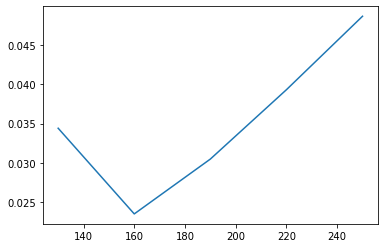

In [21]:
plt.plot(listeTaille,listeTemps)

In [22]:
g1 = g.copy()
g1

{'1': ['2', '6'],
 '2': ['3', '1'],
 '3': ['4', '2'],
 '4': ['5', '3'],
 '5': ['6', '4'],
 '6': ['1', '5']}

# Exercice 2

## Question 2.b

In [34]:
def kargenIter(g, t):
    m = -1
    gFinal = dict()
    while t > 0:
        g1 = g.copy()
        while len(g1.keys()) > 2:
            arete =randomSommet(g1)
            g1 = contraction(g1, arete)
        sIter = list(g1.keys())[0]
        if(m == -1 or len(sIter) < m):
            m = len(sIter)
            gFinal = g1.copy()
        
        t -= 1
    return gFinal
        


In [36]:
kargenIter(grapheCycle(6), 5)

{'5': ['6', '4'], '1,6,2,3,4': ['5', '5']}

## Question 2.c (Etude expérimentale)


# Exercice 3


## Qestion A 

#### On a l'algorithme de contraction partielle fait la boucle  1 + n / √2 
#### L'algorithme de Karger-Stein :  
#### 1 - Appel de l'algorithme Karger-Stein récursivement 2 fois, a chaque fois avec un graphe de 1+ n / √2 sommet et qui s'éxecute en T( 1 + n / √2 )  
#### 2 - Appel la fonction de contraction partielle.
#### 3 - La fonction de contraction partielle est appelé 1 + n / √2 fois  alors on a 
#### (1 + n / √2) * ( 1 + n / √2) => O(n²) 

#### D'après 1 et 3 on a bien  T(n) = 2 T(1 + n / √2)  + O(n²) 


#### Déduire :
#### On a l'algorithme de karger-Stein s'éxecute récursivement donc le temps d'éxecution de T(n) = O(n²*log(n))




























## Question D

In [40]:
s = 4
j = 1
sommet = []
while s > 0:
    if s % 2 == 1:
        sommet.append(j)
    s = int(s/2)
    j += 1

print(sommet)

[3]


In [112]:
def contractionPartielle(g ,t):
    g1 = g.copy()
    while(len(g1.keys()) > t):
        arete = randomSommet(g1)
        contraction(g1, arete)
        
    return g1

def calculCoup(g):
    m = -1 #la taille de la coupe minimale trouver jusqu'a maintenant 
    listKeys = list(g.keys()) #Les sommets du graphe g 
    n = len(listKeys) #Le nombre de sommet du graphe g
    nb = pow(2, n) - 2 #Le nombre de combinaison a essaie
    i = 1
    sBest = dict() #La coupe minimale
    while i < nb:
        s = i
        sommet = []
        j = 0
        ##calculer les sommets attester comme coupe
        while s > 0: 
            if s%2 == 1:
                sommet.append(j)
            s  = int(s/2)
            j += 1
        if (len(sommet) == 1): #Couper que le sommet
            som = sommet[0] #récupèrer le numéro du sommet
            som =  listKeys[som] #récupèrer la clé du sommet 
            if m == -1 or m > len(g[som]) :
                m = len(g[som])
                sBest = som
        else: #compter le nombre d'arête sortante 
            #recupèrer la coupe actuel
            sActuel = []
            for s in sommet:
                som = listKeys[s]
                for elm in som.split(','):
                    sActuel.append(elm)
            #compter le nombre d'arête de la coupe actuelle 
            coupe1 = 0
            for s in sommet:
                som = listKeys[s]
                arete = g[som] #Les successeurs du sommet 
                for elm in arete:
                    if elm not in sActuel:
                        coupe1 += 1
            if m == -1 or m > coupe1:
                m = coupe1 
                sBest = ','.join(sActuel) #La coupe minimale
        
        i += 1
    return sBest.split(",")
                
    
def kargerStein(g):
    m = -1 
    if len(list(g.keys())) <= 6:
        return calculCoup(g)
    else:
        t = int( 1 + len( list(g.keys())) / sqrt(2))
        g1 = contractionPartielle(g, t)
        s1 = kargerStein(g1)
        m1 = len(s1)
        g2 = contractionPartielle(g, t)
        s2 = kargerStein(g2)
        m2 = len(s2)
        if m1 < m2:
            return s1
        else:
            return s2
        

In [ ]:
#Test 1 sur le graphe 

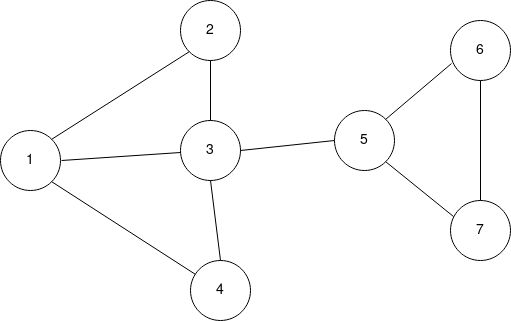

In [113]:
#Teste 1 sur un graph 
g = {'1': ['2', '4', '3'],
     '2': ['3', '1'],
     '3': ['1', '2', '4', '5'],
     '4': ['1', '3'],
     '5': ['3', '6', '7'],
     '6': ['5', '7'],
     '7': ['5', '6']
    }
kargerStein(g)

['5', '6', '7']